In [1]:
!pip install sklearn

In [9]:
import pandas as pd

In [25]:
import numpy as np

In [17]:
import matplotlib.pyplot as plt

In [2]:
!pip install --upgrade tensorflow

In [49]:
# Loading data into different variables
X_train = pd.read_csv(r"/Users/Andrew/Documents/Python/Lab 2 - AI Example Files/input_train.csv")
X_train = np.array(X_train.iloc[:,0:9])
Y_train = pd.read_csv(r"/Users/Andrew/Documents/Python/Lab 2 - AI Example Files/output_train.csv")
Y_train = np.array(Y_train)

X_test = pd.read_csv(r"/Users/Andrew/Documents/Python/Lab 2 - AI Example Files/input_test.csv")
X_test = np.array(X_test.iloc[:,0:9])
Y_test = pd.read_csv(r"/Users/Andrew/Documents/Python/Lab 2 - AI Example Files/output_test.csv")
Y_test = np.array(Y_test)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(3226, 9) (3226, 3)
(846, 9) (846, 3)


In [43]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(min_samples_split=100,random_state = 2)
regressor.fit(X_train, Y_train)

Predict = regressor.predict(X_train)

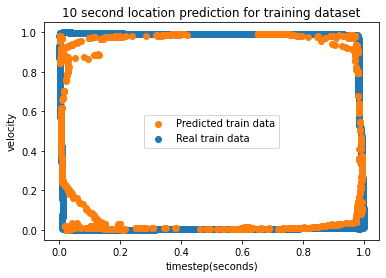

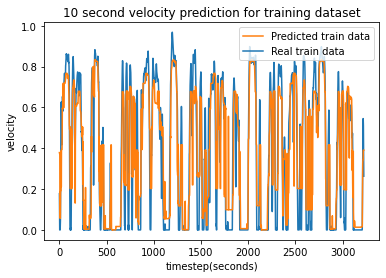

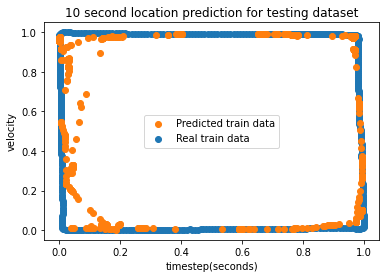

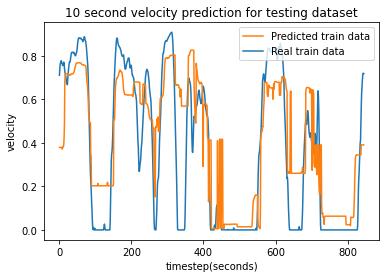

In [46]:
plt.figure(3)
Test1 = plt.scatter(Y_train[:,1], Y_train[:,2])
Predict1 = plt.scatter(Predict[:,1], Predict[:,2])
plt.legend([Predict1,Test1], ["Predicted train data", "Real train data"])
plt.title("10 second location prediction for training dataset")
plt.xlabel("timestep(seconds)")
plt.ylabel("velocity")
plt.show()

plt.figure(4)
Test2, =  plt.plot(Y_train[:,0])
Predict2, = plt.plot(Predict[:,0])
plt.legend([Predict2,Test2], ["Predicted train data", "Real train data"])
plt.title("10 second velocity prediction for training dataset")
plt.xlabel("timestep(seconds)")
plt.ylabel("velocity")
plt.show()

Predict_test = regressor.predict(X_test)

plt.figure(5)
Test3 = plt.scatter(Y_test[:,1], Y_test[:,2])
Predict3 = plt.scatter(Predict_test[:,1], Predict_test[:,2])
plt.legend([Predict3,Test3], ["Predicted train data", "Real train data"])
plt.title("10 second location prediction for testing dataset")
plt.xlabel("timestep(seconds)")
plt.ylabel("velocity")
plt.show()

plt.figure(6)
Test4, =  plt.plot(Y_test[:,0])
Predict4, = plt.plot(Predict_test[:,0])
plt.legend([Predict4,Test4], ["Predicted train data", "Real train data"])
plt.title("10 second velocity prediction for testing dataset")
plt.xlabel("timestep(seconds)")
plt.ylabel("velocity")
plt.show()